In [1]:
#!/usr/bin/python

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib notebook
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import my_classifier_utils
import my_data_utils

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] 
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print data_dict[data_dict.keys()[0]]

feature_set = set()
for key in data_dict:
    feature_set = feature_set.union(data_dict[key].keys())
print feature_set

{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}
set(['to_messages', 'deferral_payments', 'bonus', 'total_stock_value', 'expenses', 'director_fees', 'from_this_person_to_poi', 'poi', 'deferred_income', 'email_address', 'from_poi_to_this_person', 'salary', 'total_payments', 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', 'long_term_incentive'])


In [3]:
print "Number of records:", len(data_dict.keys())
print "Number of poi:", len([key for key in data_dict.keys() if data_dict[key]["poi"]== 1])
print "Number of non-poi:", len([key for key in data_dict.keys() if data_dict[key]["poi"]== 0])
print "Number of Features:", len(feature_set)

Number of records: 146
Number of poi: 18
Number of non-poi: 128
Number of Features: 21


In [4]:
### Task 2: Remove outliers
%matplotlib notebook
import my_data_utils

<IPython.core.display.Javascript object>


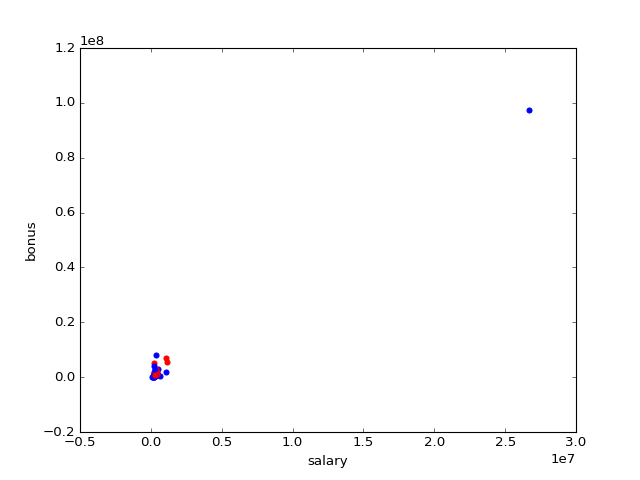

In [5]:
my_data_utils.plot_two(data_dict, 'salary', 'bonus')

In [6]:
my_data_utils.maxPrinter(data_dict, 'salary')
print 'remove max'
my_data_utils.removeMax(data_dict, 'salary')
my_data_utils.maxPrinter(data_dict, 'salary')

Max salary TOTAL 26704229
remove max
Max salary SKILLING JEFFREY K 1111258


<IPython.core.display.Javascript object>


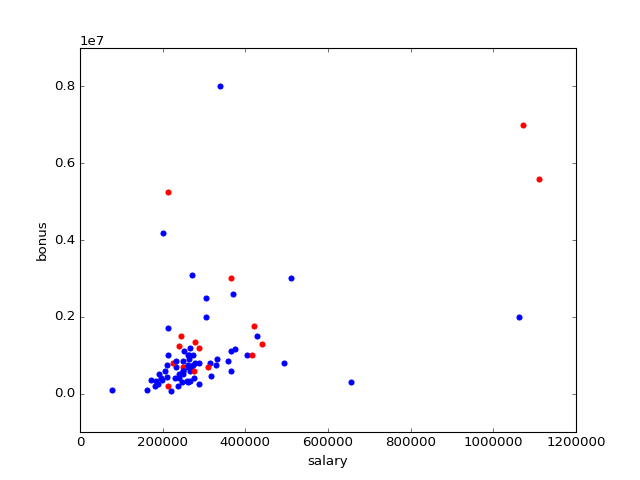

In [7]:
my_data_utils.plot_two(data_dict, 'salary', 'bonus')

<IPython.core.display.Javascript object>


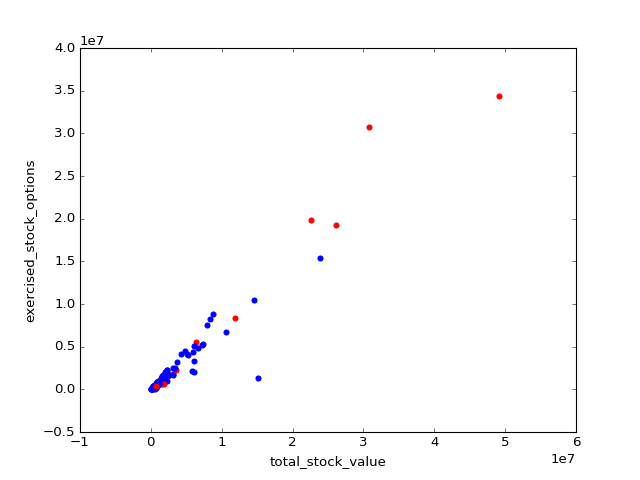

In [8]:
my_data_utils.plot_two(data_dict, 'total_stock_value', 'exercised_stock_options')

In [9]:
my_data_utils.maxPrinter(data_dict, 'restricted_stock')
my_data_utils.maxPrinter(data_dict, 'total_payments')

Max restricted_stock LAY KENNETH L 14761694
Max total_payments LAY KENNETH L 103559793


<IPython.core.display.Javascript object>


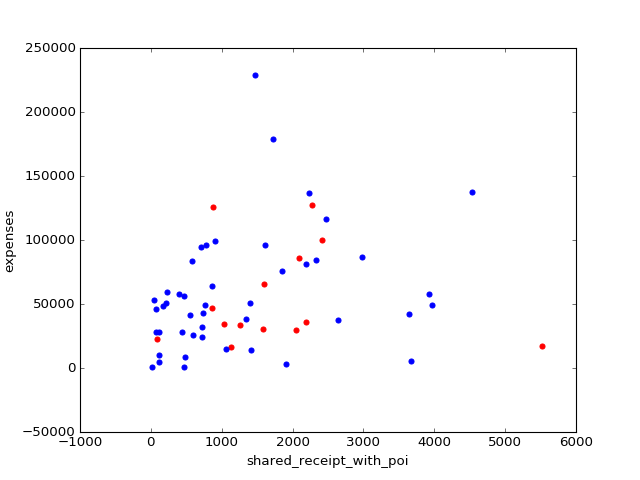

In [10]:
my_data_utils.plot_two(data_dict, 'shared_receipt_with_poi', 'expenses')

In [11]:
my_data_utils.maxPrinter(data_dict, 'shared_receipt_with_poi')

Max shared_receipt_with_poi BELDEN TIMOTHY N 5521


<IPython.core.display.Javascript object>


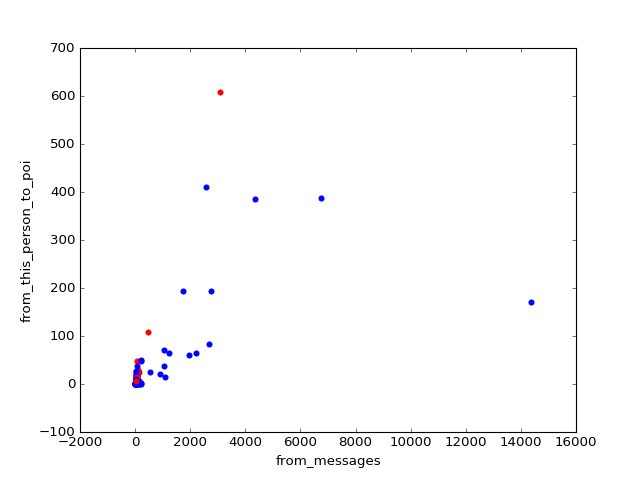

In [12]:
my_data_utils.plot_two(data_dict, 'from_messages', 'from_this_person_to_poi')

In [13]:
my_data_utils.maxPrinter(data_dict,'from_messages')
my_data_utils.maxPrinter(data_dict,'from_this_person_to_poi')

Max from_messages KAMINSKI WINCENTY J 14368
Max from_this_person_to_poi DELAINEY DAVID W 609


<IPython.core.display.Javascript object>


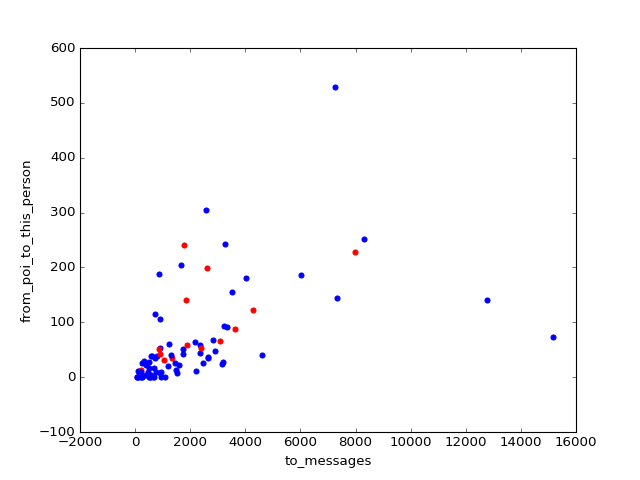

In [14]:
my_data_utils.plot_two(data_dict, 'to_messages', 'from_poi_to_this_person')

In [15]:
### Task 3: Create new feature(s)
#email_to_poi_ratio
#email_from_poi_ratio
for key in data_dict.keys():
    email_to = data_dict[key]['to_messages']
    to_poi = data_dict[key]['from_this_person_to_poi']
    email_from = data_dict[key]['from_messages']
    from_poi = data_dict[key]['from_poi_to_this_person']
    exer_stock_opt = data_dict[key]['exercised_stock_options']
    total_stock = data_dict[key]['total_stock_value']
    
    if 'NaN' not in (email_to, to_poi):
        data_dict[key]['email_to_poi_ratio'] = float(to_poi)/float(email_to)
    else:
        data_dict[key]['email_to_poi_ratio'] = 'NaN'
    if 'NaN' not in (email_from, from_poi):
        data_dict[key]['email_from_poi_ratio'] = float(from_poi)/float(email_from)
    else:
        data_dict[key]['email_from_poi_ratio'] = 'NaN'
    if 'NaN' not in (exer_stock_opt, total_stock):
        data_dict[key]['exer_stock_ratio'] = float(exer_stock_opt)/float(total_stock)
    else:
        data_dict[key]['exer_stock_ratio'] = 'NaN'

<IPython.core.display.Javascript object>


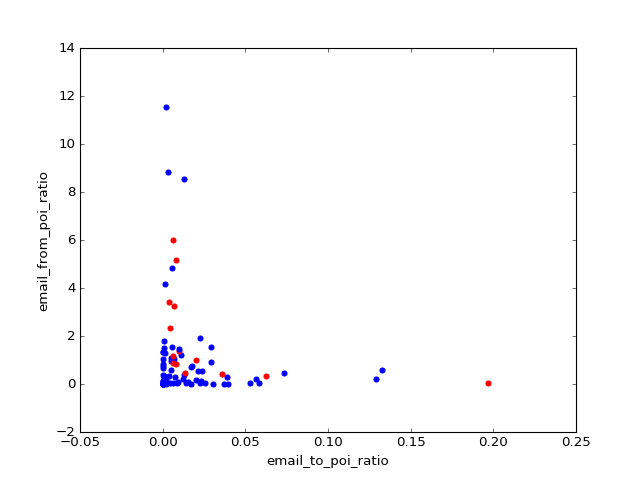

In [16]:
my_data_utils.plot_two(data_dict, 'email_to_poi_ratio', 'email_from_poi_ratio')

<IPython.core.display.Javascript object>


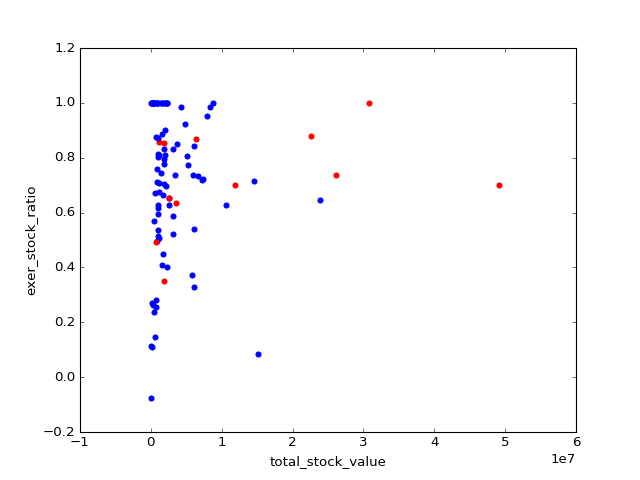

In [17]:
my_data_utils.plot_two(data_dict, 'total_stock_value', 'exer_stock_ratio')

In [18]:
print data_dict[data_dict.keys()[0]]

feature_set = set()
for key in data_dict:
    feature_set = feature_set.union(data_dict[key].keys())
print feature_set

for key in feature_set:
    countNaN = len([name for name in data_dict.keys() if data_dict[name][key] == 'NaN'])
    print str(countNaN),"-", key

{'to_messages': 807, 'deferral_payments': 'NaN', 'expenses': 94299, 'poi': False, 'deferred_income': 'NaN', 'email_address': 'mark.metts@enron.com', 'long_term_incentive': 'NaN', 'restricted_stock_deferred': 'NaN', 'shared_receipt_with_poi': 702, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'director_fees': 'NaN', 'email_from_poi_ratio': 1.3103448275862069, 'bonus': 600000, 'total_stock_value': 585062, 'from_poi_to_this_person': 38, 'from_this_person_to_poi': 1, 'restricted_stock': 585062, 'salary': 365788, 'total_payments': 1061827, 'email_to_poi_ratio': 0.0012391573729863693, 'exercised_stock_options': 'NaN', 'exer_stock_ratio': 'NaN'}
set(['to_messages', 'email_from_poi_ratio', 'restricted_stock_deferred', 'deferral_payments', 'bonus', 'total_stock_value', 'expenses', 'from_this_person_to_poi', 'poi', 'deferred_income', 'shared_receipt_with_poi', 'email_address', 'long_term_incentive', 'salary', 'total_payments', 'loan_advances', 'restricted_stock', 'email_to_poi_rati

In [30]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 
def testAFewClassifiers(data_dict, features_list):
    my_dataset = data_dict
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)    
    ### base test/train split for simple 
    from sklearn.cross_validation import train_test_split
    features_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

    # Set up cross validator (will be used for tuning all classifiers)
    from sklearn import cross_validation
    cv = cross_validation.StratifiedShuffleSplit(labels_train, test_size=.1, random_state = 42)
    #a_grid_search = GridSearchCV(clf, param_grid = clf_params,cv = cv, scoring = 'recall')
    
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(features)
    scaled_features = scaler.transform(features)
    scaled_features_train = scaler.transform(features_train)
    scaled_features_test = scaler.transform(features_test)
    
    ### Test Gaussian NB
    print "+++++++++++++++++++++++++++++++++++++"
    print "Gaussian NB Classifier"
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    clf_pred = my_classifier_utils.trainAndTestClassifier (clf, features_train, features_test, labels_train, labels_test)
    print clf_pred
    print ""
    
    
    
    ### Test Adaboost decision tree
    print "+++++++++++++++++++++++++++++++++++++"
    print "Ada Boost Decision Tree Classifier"
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn import tree
    abcDT = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME")
    abcDT_pred = my_classifier_utils.trainAndTestClassifier (abcDT, features_train, features_test, labels_train, labels_test)
    print abcDT_pred
    print ""

    print 'AB Importance:'
    for i in range (0,len(features_list)-1):
        print features_list[i+1], ":", abcDT.feature_importances_[i]
    print ""  


    ### Test K Neighbors (scaled)
    print "+++++++++++++++++++++++++++++++++++++"
    print "Grid Search K Neighbors Classifier"
    from sklearn.neighbors import KNeighborsClassifier
    parameters = {'n_neighbors':[2,3,5,8,10,15], 'leaf_size':[3,10,30,75]}
    temp_kn = KNeighborsClassifier()
    from sklearn.model_selection import GridSearchCV
    knGridClf = GridSearchCV(temp_kn, parameters, scoring='f1', cv = cv)
    knGrid_pred = my_classifier_utils.trainAndTestClassifier (knGridClf, scaled_features_train,
                                                                scaled_features_test, labels_train, labels_test)
    print knGrid_pred
    print knGridClf.best_params_
    print ""

    ### Test Decision Trees 
    from sklearn import tree
    print "+++++++++++++++++++++++++++++++++++++"
    print "Grid Search Decision Tree Classifier"
    parameters = {'max_depth':[2,3,5,8,10,15], 'min_samples_split':[2,3,5], 'criterion' : ['gini','entropy'],
                  'class_weight': [{True: 12, False: 1}, {True: 4, False: 1}, 'auto', None]}
    tempDTClf = tree.DecisionTreeClassifier()
    from sklearn.model_selection import GridSearchCV
    gridClf = GridSearchCV(tempDTClf, parameters, scoring='f1', cv=cv)
    grid_pred = my_classifier_utils.trainAndTestClassifier (gridClf, features_train, features_test, labels_train, labels_test)
    print grid_pred
    print gridClf.best_params_

    print 'Grid DT Importance:'
    for i in range (0,len(features_list)-1):
        print features_list[i+1], ":", gridClf.best_estimator_.feature_importances_[i]
    print ""
    
    return gridClf
    


In [28]:
def useFeaturesList(features_list, data_dict):
    testAFewClassifiers(data_dict, features_list)
    my_dataset = data_dict
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)   
    print len(features)
    

In [29]:
all_features_list = ['poi', 'to_messages', 'email_from_poi_ratio', 'restricted_stock_deferred', 'deferral_payments',
                     'bonus', 'total_stock_value', 'expenses', 'from_this_person_to_poi', 'deferred_income', 
                     'shared_receipt_with_poi', 'long_term_incentive', 'salary', 'total_payments', 
                     'loan_advances', 'restricted_stock', 'email_to_poi_ratio', 'from_poi_to_this_person',
                     'exercised_stock_options', 'from_messages', 'other', 'exer_stock_ratio', 'director_fees']
useFeaturesList(all_features_list, data_dict)

+++++++++++++++++++++++++++++++++++++
Gaussian NB Classifier
100 Training Points
training time: 0.001 s
predict time: 0.0 s
accuracy: 0.84
Train Precision: 0.411764705882
Train Recall: 0.538461538462

44 Test Points
predict time: 0.0 s
accuracy: 0.818181818182
8 Wrong ones: [(7, 0.0), (15, 0.0), (19, 0.0), (26, 1.0), (31, 1.0), (32, 1.0), (40, 0.0), (43, 1.0)]
1 True Positives: [14]
35 True Negatives: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 41, 42]
4 False Positives: [7, 15, 19, 40]
4 False Negatives: [26, 31, 32, 43]
Precision: 0.2
Recall: 0.2

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.]

+++++++++++++++++++++++++++++++++++++
Ada Boost Decision Tree Classifier
100 Training Points
training time: 0.149 s
predict time: 0.004 s
accuracy: 1.0
Train Precision: 1.0
Train Reca

In [22]:
def my_k_fold_test_short (classifier, features, labels, kval=10):
    from sklearn.model_selection import KFold
    k_fold = KFold(kval)

    #print "Iteration: precision, recall, f1"
    precision = []
    recall = []
    f1 = []

    for k, (train, test) in enumerate(k_fold.split(features, labels)):
        scores = scoreClassifier (classifier,
                                     [features[ii] for ii in train], [features[ii] for ii in test],
                                     [labels[ii] for ii in train], [labels[ii] for ii in test]) 
        #print "#", k,":", scores
        precision.append(scores[0])
        recall.append(scores[1])
        f1.append(scores[2])
    avPrecision = sum(precision)/kval
    avRecall = sum(recall)/kval
    avF1 = sum(f1)/kval
    print 'Precision', avPrecision, ', Recall', avRecall, ', F1', avF1

def scoreClassifier(classifier, features_train, features_test, labels_train, labels_test):
    from sklearn import metrics
    classifier.fit(features_train, labels_train)
    test_pred = classifier.predict(features_test)
    precision = metrics.precision_score(labels_test, test_pred)
    recall = metrics.recall_score(labels_test, test_pred)  
    f1 = metrics.f1_score(labels_test, test_pred)
    return (precision, recall, f1)

In [23]:
def simplyScoreAFewClassifiers (data_dict, features_list):
    my_dataset = data_dict
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)    
    ### base test/train split for simple 
    from sklearn.cross_validation import train_test_split
    features_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

    # Set up cross validator (will be used for tuning all classifiers)
    from sklearn import cross_validation
    cv = cross_validation.StratifiedShuffleSplit(labels_train, test_size=.1, random_state = 42)
    #a_grid_search = GridSearchCV(clf, param_grid = clf_params,cv = cv, scoring = 'recall')
    
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(features)
    scaled_features = scaler.transform(features)
    scaled_features_train = scaler.transform(features_train)
    scaled_features_test = scaler.transform(features_test)
    
    ### Test Gaussian NB
    print "+++++++++++++++++++++++++++++++++++++"
    print "Gaussian NB Classifier"
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    my_k_fold_test_short(clf, features, labels)
    print ""
    
    ### Test Adaboost decision tree
    print "+++++++++++++++++++++++++++++++++++++"
    print "Ada Boost Decision Tree Classifier"
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn import tree
    abcDT = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME")
    my_k_fold_test_short(abcDT, features, labels)
    print ""


    ### Test K Neighbors (scaled)
    print "+++++++++++++++++++++++++++++++++++++"
    print "Grid Search - Best K Neighbors Classifier"
    from sklearn.neighbors import KNeighborsClassifier
    parameters = {'n_neighbors':[2,3,5,8,10,15], 'leaf_size':[3,10,30,75]}
    temp_kn = KNeighborsClassifier()
    from sklearn.model_selection import GridSearchCV
    knGridClf = GridSearchCV(temp_kn, parameters, scoring='f1', cv = cv)
    best_kn = knGridClf.fit(scaled_features_train, labels_train).best_estimator_
    my_k_fold_test_short(best_kn, features, labels)
    print ""

    ### Test Decision Trees 
    from sklearn import tree
    print "+++++++++++++++++++++++++++++++++++++"
    print "Grid Search Decision Tree Classifier"
    parameters = {'max_depth':[2,3,5,8,10,15], 'min_samples_split':[2,3,5], 'criterion' : ['gini','entropy'],
                  'class_weight': [{True: 12, False: 1}, {True: 4, False: 1}, 'auto', None]}
    tempDTClf = tree.DecisionTreeClassifier()
    from sklearn.model_selection import GridSearchCV
    gridClf = GridSearchCV(tempDTClf, parameters, scoring='f1', cv=cv)
    best_dt = gridClf.fit(features_train, labels_train).best_estimator_
    my_k_fold_test_short(best_dt, features, labels)


In [24]:
print 'Test with all of the features:'
print all_features_list
simplyScoreAFewClassifiers(data_dict, all_features_list)

Test with all of the features:
['poi', 'to_messages', 'email_from_poi_ratio', 'restricted_stock_deferred', 'deferral_payments', 'bonus', 'total_stock_value', 'expenses', 'from_this_person_to_poi', 'deferred_income', 'shared_receipt_with_poi', 'long_term_incentive', 'salary', 'total_payments', 'loan_advances', 'restricted_stock', 'email_to_poi_ratio', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'exer_stock_ratio', 'director_fees']
+++++++++++++++++++++++++++++++++++++
Gaussian NB Classifier
Precision 0.204848484848 , Recall 0.466666666667 , F1 0.27380952381

+++++++++++++++++++++++++++++++++++++
Ada Boost Decision Tree Classifier


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Precision 0.283333333333 , Recall 0.183333333333 , F1 0.206666666667

+++++++++++++++++++++++++++++++++++++
Grid Search - Best K Neighbors Classifier
Precision 0.3 , Recall 0.25 , F1 0.25

+++++++++++++++++++++++++++++++++++++
Grid Search Decision Tree Classifier
Precision 0.225 , Recall 0.133333333333 , F1 0.161904761905


In [25]:
print "Test with features based on exploration intuition"
features_list_intuition = ['poi','salary','bonus', 'total_payments','exercised_stock_options',
                           'shared_receipt_with_poi','expenses','email_to_poi_ratio', 'email_from_poi_ratio',
                           'exer_stock_ratio'] 
print features_list_intuition
simplyScoreAFewClassifiers(data_dict, features_list_intuition)

Test with features based on exploration intuition
['poi', 'salary', 'bonus', 'total_payments', 'exercised_stock_options', 'shared_receipt_with_poi', 'expenses', 'email_to_poi_ratio', 'email_from_poi_ratio', 'exer_stock_ratio']
+++++++++++++++++++++++++++++++++++++
Gaussian NB Classifier
Precision 0.333333333333 , Recall 0.333333333333 , F1 0.316666666667

+++++++++++++++++++++++++++++++++++++
Ada Boost Decision Tree Classifier
Precision 0.2 , Recall 0.133333333333 , F1 0.156666666667

+++++++++++++++++++++++++++++++++++++
Grid Search - Best K Neighbors Classifier
Precision 0.3 , Recall 0.203333333333 , F1 0.206666666667

+++++++++++++++++++++++++++++++++++++
Grid Search Decision Tree Classifier
Precision 0.234487734488 , Recall 0.88 , F1 0.350665445665


In [31]:
print "Test with features based on example DT importance"

features_list_importance = ['poi', 'other', 'expenses', 'total_stock_value', 'exercised_stock_options',
                            'long_term_incentive', 'from_this_person_to_poi', 'from_messages', 'restricted_stock']
print features_list_importance
simplyScoreAFewClassifiers(data_dict, features_list_importance)

Test with features based on example DT importance
['poi', 'other', 'expenses', 'total_stock_value', 'exercised_stock_options', 'long_term_incentive', 'from_this_person_to_poi', 'from_messages', 'restricted_stock']
+++++++++++++++++++++++++++++++++++++
Gaussian NB Classifier
Precision 0.3 , Recall 0.25 , F1 0.25

+++++++++++++++++++++++++++++++++++++
Ada Boost Decision Tree Classifier
Precision 0.35 , Recall 0.266666666667 , F1 0.296666666667

+++++++++++++++++++++++++++++++++++++
Grid Search - Best K Neighbors Classifier
Precision 0.4 , Recall 0.233333333333 , F1 0.283333333333

+++++++++++++++++++++++++++++++++++++
Grid Search Decision Tree Classifier
Precision 0.341666666667 , Recall 0.825 , F1 0.444047619048


In [ ]:
def get_best_nb (data_dict, features_list):    
    print "+++++++++++++++++++++++++++++++++++++"
    print "Returning Gaussian NB Classifier"
    print "Features:", features_list
    my_dataset = data_dict
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)    

    ### Test Gaussian NBc
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    my_k_fold_test_short(clf, features, labels)
    return clf

best_nb = get_best_nb(data_dict, features_list_intuition)

In [ ]:
#dump_classifier_and_data(best_nb, data_dict, features_list_intuition)

In [ ]:
def get_best_decision_tree(data_dict, features_list):
    print "+++++++++++++++++++++++++++++++++++++"
    print "Returning best Grid Search Decision Tree Classifier"
    print 'Features:', features_list
    my_dataset = data_dict
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)    
    ### base test/train split for simple 
    from sklearn.cross_validation import train_test_split
    features_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

    # Set up cross validator (will be used for tuning all classifiers)
    from sklearn import cross_validation
    cv = cross_validation.StratifiedShuffleSplit(labels_train, test_size=.1, random_state = 42)

    ### Test Decision Trees 
    from sklearn import tree
    parameters = {'max_depth':[2,3,5,8,10,15], 'min_samples_split':[2,3,5], 'criterion' : ['gini','entropy'],
                  'class_weight': [{True: 12, False: 1}, {True: 4, False: 1}, 'auto', None]}
    tempDTClf = tree.DecisionTreeClassifier()
    from sklearn.model_selection import GridSearchCV
    gridClf = GridSearchCV(tempDTClf, parameters, scoring='f1', cv=cv)
    best_dt = gridClf.fit(features_train, labels_train).best_estimator_
    my_k_fold_test_short(best_dt, features, labels)
    return best_dt
    
best_dt = get_best_decision_tree(data_dict, features_list_importance)

In [ ]:
dump_classifier_and_data(best_dt, data_dict, features_list_importance)

In [ ]:
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()
